# Cricket Regression - By Ganesh Ram

## Importing Data, packages and cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [78]:
import matplotlib.pyplot as plt

### Set Engine to Python to avoid unicode utf-8 errors

In [2]:
data = pd.read_csv('C:/Users/LiveWire/Downloads/ICC Test Batting Figures.csv', engine = 'python')

In [3]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [4]:
data = data.replace('-',np.NaN)

In [5]:
data = data.dropna()

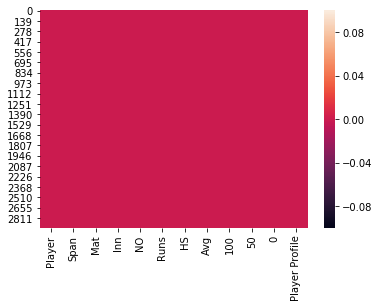

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.drop(['Player Profile'], axis=1, inplace=True)

In [8]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9


In [9]:
data.dtypes

Player    object
Span      object
Mat        int64
Inn       object
NO        object
Runs      object
HS        object
Avg       object
100       object
50        object
0         object
dtype: object

In [10]:
def not_out_col(hs):
    
    if '*' in hs:
        return 1
    else:
        return 0

In [11]:
data['HS-NO'] = data['HS'].apply(not_out_col)

In [12]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,1
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,0
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,0
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,0
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,0


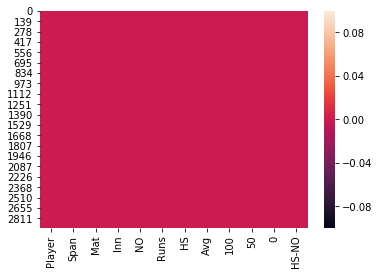

In [13]:
sns.heatmap(data.isnull())

In [14]:
data[:50]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,1
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,0
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,0
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,0
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,0
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,0
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,1
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,1
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,0
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,0


In [15]:
def remove_ast(hs):
    return hs.replace('*','')

In [16]:
data['HS'] = data['HS'].apply(remove_ast)

In [17]:
data[:50]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14,1
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,0
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,0
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,0
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,0
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,0
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400,52.88,34,48,17,1
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203,51.37,30,66,15,1
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,0
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,0


### Converting Span Column into Number of Years and assigning it as new feature

In [18]:
def find_years(span):
    
    years = span.split('-')
    start = years[0]
    end = years[1]
    
    return(int(end) - int(start))

In [19]:
data['No_of_years'] = data['Span'].apply(find_years)

In [20]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO,No_of_years
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14,1,24
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,0,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,0,18
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,0,16
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,0,12


In [21]:
data.drop(['Span'], axis=1, inplace = True)

In [22]:
data.head()

,Player,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO,No_of_years
0,SR Tendulkar (INDIA),200,329,33,15921,248,53.78,51,68,14,1,24
1,RT Ponting (AUS),168,287,29,13378,257,51.85,41,62,17,0,17
2,JH Kallis (ICC/SA),166,280,40,13289,224,55.37,45,58,16,0,18
3,R Dravid (ICC/INDIA),164,286,32,13288,270,52.31,36,63,8,0,16
4,AN Cook (ENG),161,291,16,12472,294,45.35,33,57,9,0,12


In [23]:
data.drop(['Player'], axis=1, inplace = True)

In [24]:
data.head()

,Mat,Inn,NO,Runs,HS,Avg,100,50,0,HS-NO,No_of_years
0,200,329,33,15921,248,53.78,51,68,14,1,24
1,168,287,29,13378,257,51.85,41,62,17,0,17
2,166,280,40,13289,224,55.37,45,58,16,0,18
3,164,286,32,13288,270,52.31,36,63,8,0,16
4,161,291,16,12472,294,45.35,33,57,9,0,12


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop(['Avg'],axis=1)
y = data['Avg']

In [27]:
X.shape, y.shape

((2913, 10), (2913,))

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.35, random_state = 100)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1893, 10), (1893,), (1020, 10), (1020,))

## Machine Learning

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lir = LinearRegression()

In [32]:
lir.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
prediction1 = lir.predict(X_test)

### Linear Regression Evaluation

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
print(mean_squared_error(y_test,prediction1))

61.24682981476872


In [36]:
print(np.sqrt(mean_squared_error(y_test,prediction1)))

7.826035382923381


In [37]:
print(mean_absolute_error(y_test,prediction1))

5.418919449710241


In [38]:
print(r2_score(y_test,prediction1))

0.7001796037832053


## Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtree = DecisionTreeRegressor()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
prediction2 = dtree.predict(X_test)

### Decision Tree Evaluation

In [43]:
print(mean_squared_error(y_test,prediction2))

39.724920294117645


In [44]:
print(np.sqrt(mean_squared_error(y_test,prediction2)))

6.302770842583256


In [45]:
print(mean_absolute_error(y_test,prediction2))

3.5441862745098036


In [46]:
print(r2_score(y_test,prediction2))

0.8055353823490314


## Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

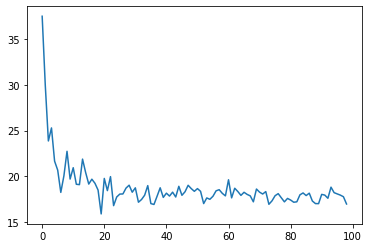

In [80]:
error_rate = []

for i in range(1,100):
    rf_i = RandomForestRegressor(n_estimators=i)
    rf_i.fit(X_train,y_train)
    pred_i = rf_i.predict(X_test)
    error_rate.append(mean_squared_error(y_test,pred_i))

plt.plot(error_rate)

In [143]:
rf = RandomForestRegressor(n_estimators=18)

In [144]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=18,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [145]:
prediction3 = rf.predict(X_test)

### Random Forest Evaluation

In [146]:
print(mean_squared_error(y_test,prediction3))

17.11859257595013


In [147]:
print(np.sqrt(mean_squared_error(y_test,prediction3)))

4.137462093596766


In [148]:
print(mean_absolute_error(y_test,prediction3))

2.542293572984749


In [149]:
print(r2_score(y_test,prediction3))

0.9161996918972347


## ADABoost Regression

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [150]:
adabr = AdaBoostRegressor(n_estimators=18)

In [151]:
adabr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=18, random_state=None)

In [152]:
prediction4 = adabr.predict(X_test)

### ADABoost Evaluation

In [153]:
print(mean_squared_error(y_test,prediction4))

51.09939341145105


In [154]:
print(np.sqrt(mean_squared_error(y_test,prediction4)))

7.148383972021302


In [155]:
print(mean_absolute_error(y_test,prediction4))

5.484333971919759


In [156]:
print(r2_score(y_test,prediction4))

0.7498541487715534


# End